In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pathlib import Path

In [2]:
def boxplot_diagnosis_dataset(df, y_column):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='diagnosis', y=y_column, hue='dataset', data=df, palette="colorblind")
    plt.title(f'{y_column} by diagnosis across datasets')
    plt.xlabel('Diagnosis')
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.legend(title='dataset')
    plt.show()

In [3]:
def histogram_diagnosis_dataset(df, y_column):
    g = sns.FacetGrid(df, col="dataset", row="diagnosis", hue="diagnosis", 
                  height=4, sharex=True, sharey=False, palette="colorblind")

    # Map the plt.hist function to each subplot
    g.map(plt.hist, y_column, bins=10, edgecolor="k").add_legend()

    g.fig.suptitle(f'{y_column} by diagnosis across datasets', fontsize=16, y=1.05)
    g.set_axis_labels(y_column, 'Count')
    g.set_titles("{col_name}", size=14)
    plt.show()

In [4]:
def boxplot_diagnosis_sex(df, y_column, group):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[df['diagnosis'] == group], x='sex', y=y_column, palette="colorblind")
    plt.title(f'{y_column} by diagnosis and sex ({group} only)')
    plt.xlabel('Sex')
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()

# Load TSV of scans passed QC, generated using script filter_pheno_qc.py

In [5]:
passed_qc_p = Path("/home/neuromod/wrangling-phenotype/outputs/passed_qc_master.tsv")
df = pd.read_csv(passed_qc_p, sep="\t")

In [6]:
# How many scans passed QC?
df.groupby('dataset').size()

dataset
cobre        122
ds000030     241
hcpep        697
srpbs       1067
dtype: int64

In [7]:
# How many individual participants passed QC?
df.groupby('dataset').nunique()['participant_id']

dataset
cobre        122
ds000030     241
hcpep        179
srpbs       1067
Name: participant_id, dtype: int64

# Take a look at diagnoses

In [8]:
# Optionally for HCP-EP, replace PSYC diagnosis with SCHZ for ease
df.loc[df['diagnosis'] == 'PSYC', 'diagnosis'] = 'SCHZ'

In [9]:
# Create pivot table of diagnoses per dataset, and totals
def count_unique(series):
    return series.nunique()

pivot_table = df.pivot_table(index='diagnosis', columns='dataset', values='participant_id', aggfunc=count_unique, fill_value=0, margins=True, margins_name='TOTAL')
pivot_table

dataset,cobre,ds000030,hcpep,srpbs,TOTAL
diagnosis,,,,,
ADHD,0,37,0,0,37
ASD,0,0,0,117,117
BIPOLAR,0,49,0,33,82
CON,67,111,57,605,823
DYSTHYMIA,0,0,0,3,3
MDD,0,0,0,167,167
OTHER,0,0,0,14,14
PAIN,0,0,0,22,22
SCHZ,53,44,120,106,323


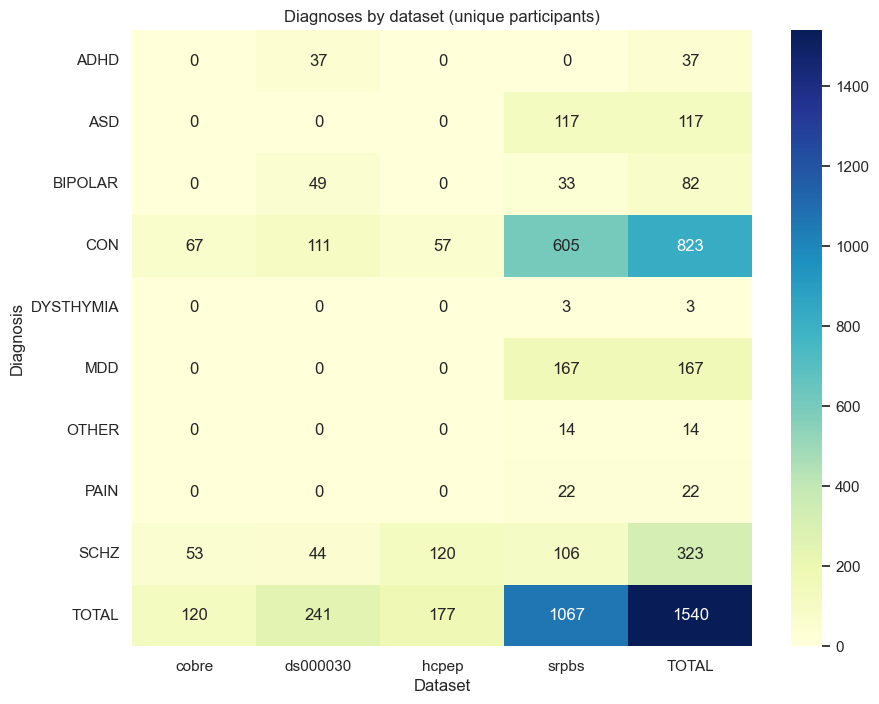

In [10]:
sns.set_theme(style="white")

# Create a heatmap to show diagnoses numbers per dataset
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Diagnoses by dataset (unique participants)')
plt.ylabel('Diagnosis')
plt.xlabel('Dataset')
plt.show()

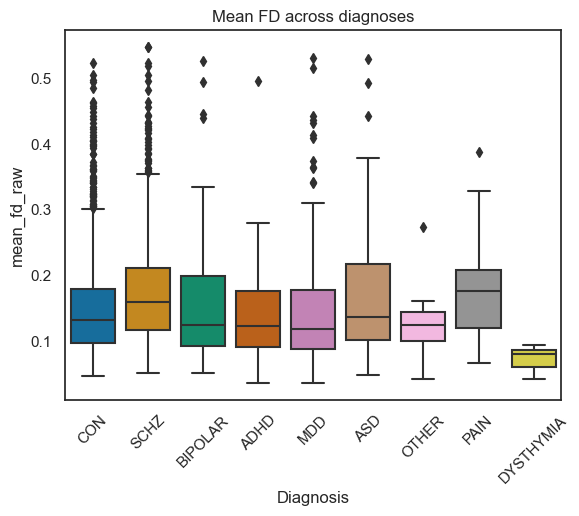

In [11]:
# Mean FD across diagnoses
sns.boxplot(data=df, x='diagnosis', y='mean_fd_raw', palette="colorblind")

plt.xticks(rotation=45) 
plt.title('Mean FD across diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('mean_fd_raw')
plt.show()

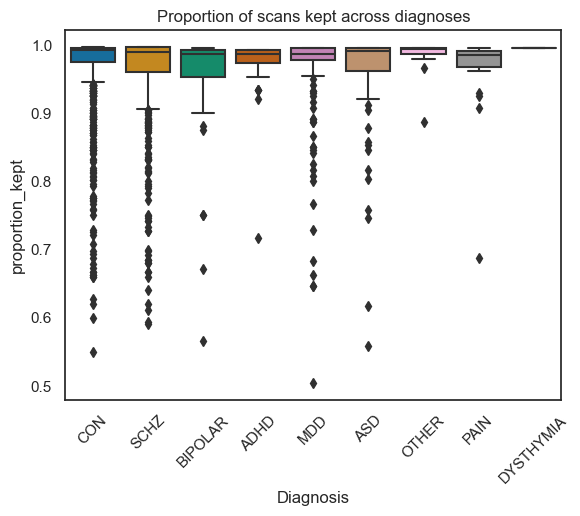

In [12]:
# Proportion kept across diagnoses
sns.boxplot(data=df, x='diagnosis', y='proportion_kept', palette="colorblind")

plt.xticks(rotation=45) 
plt.title('Proportion of scans kept across diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('proportion_kept')
plt.show()

# Generate more detailed plots

In [13]:
# If needed, select subset of diagnoses
diagnoses = ['CON', 'SCHZ']
df = df.loc[df['diagnosis'].isin(diagnoses)].copy()

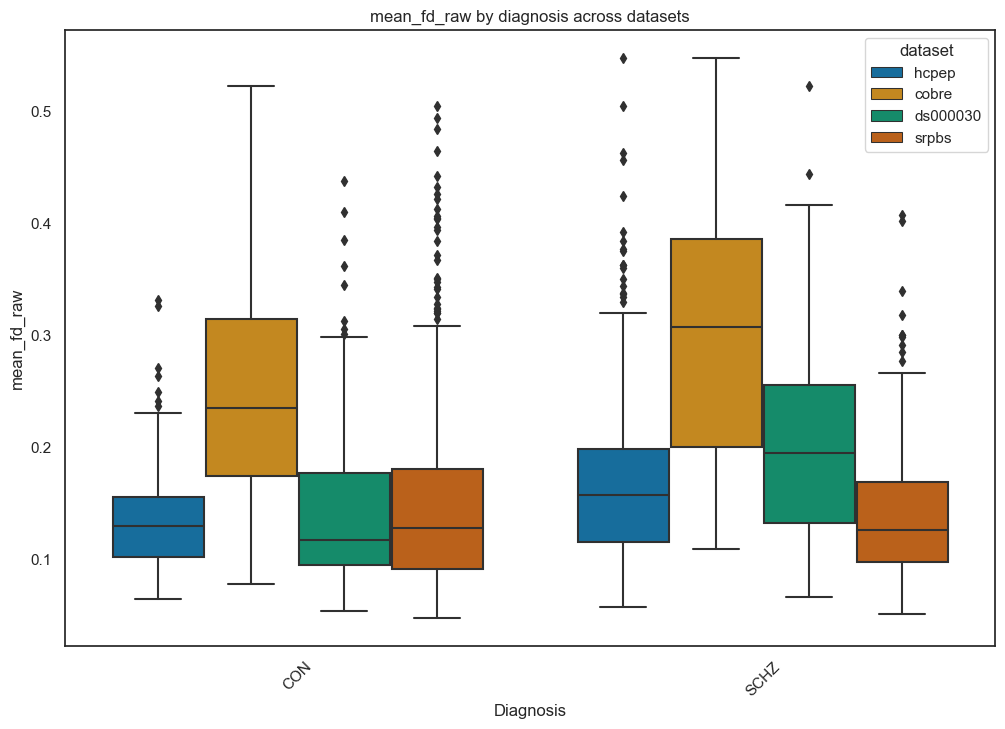

In [14]:
boxplot_diagnosis_dataset(df, 'mean_fd_raw')

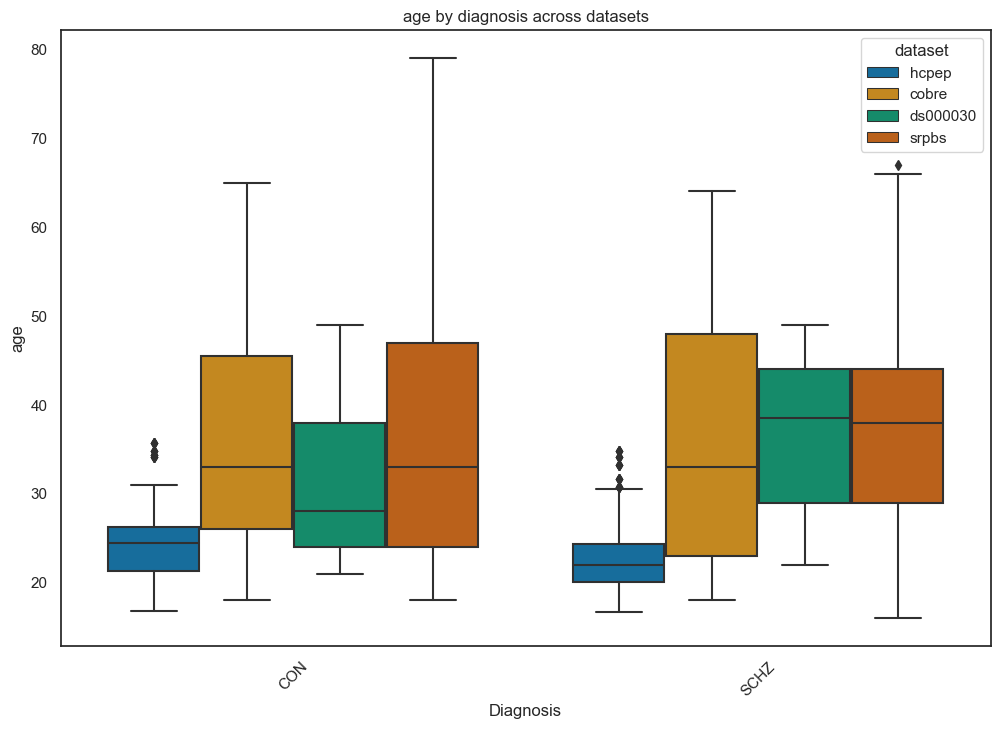

In [15]:
boxplot_diagnosis_dataset(df, 'age')

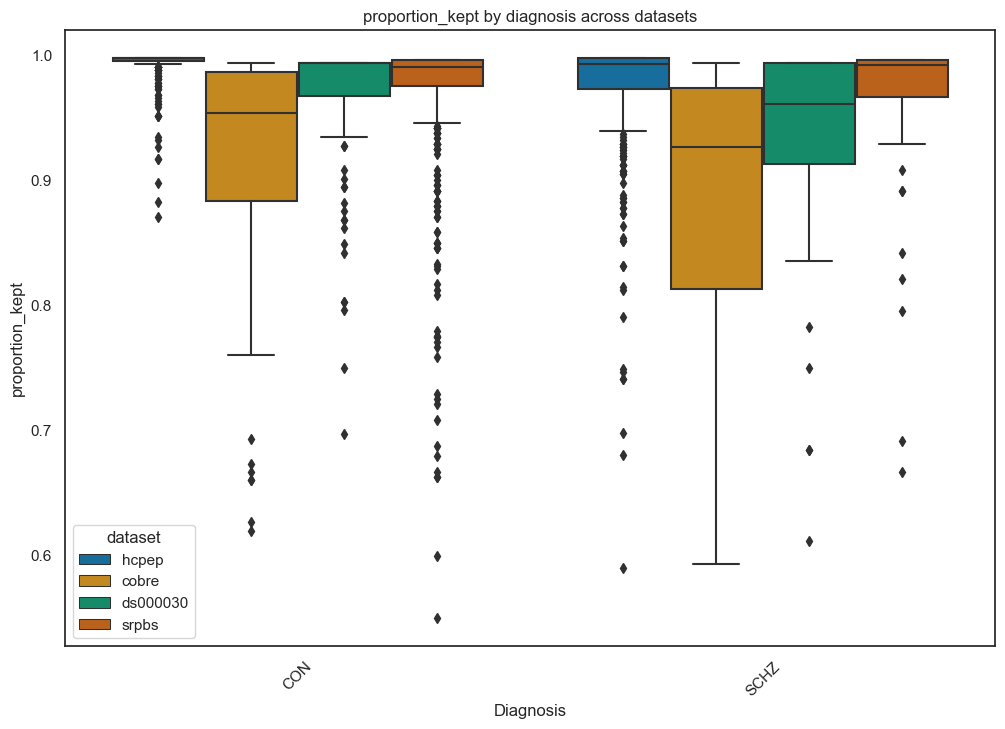

In [16]:
boxplot_diagnosis_dataset(df, 'proportion_kept')

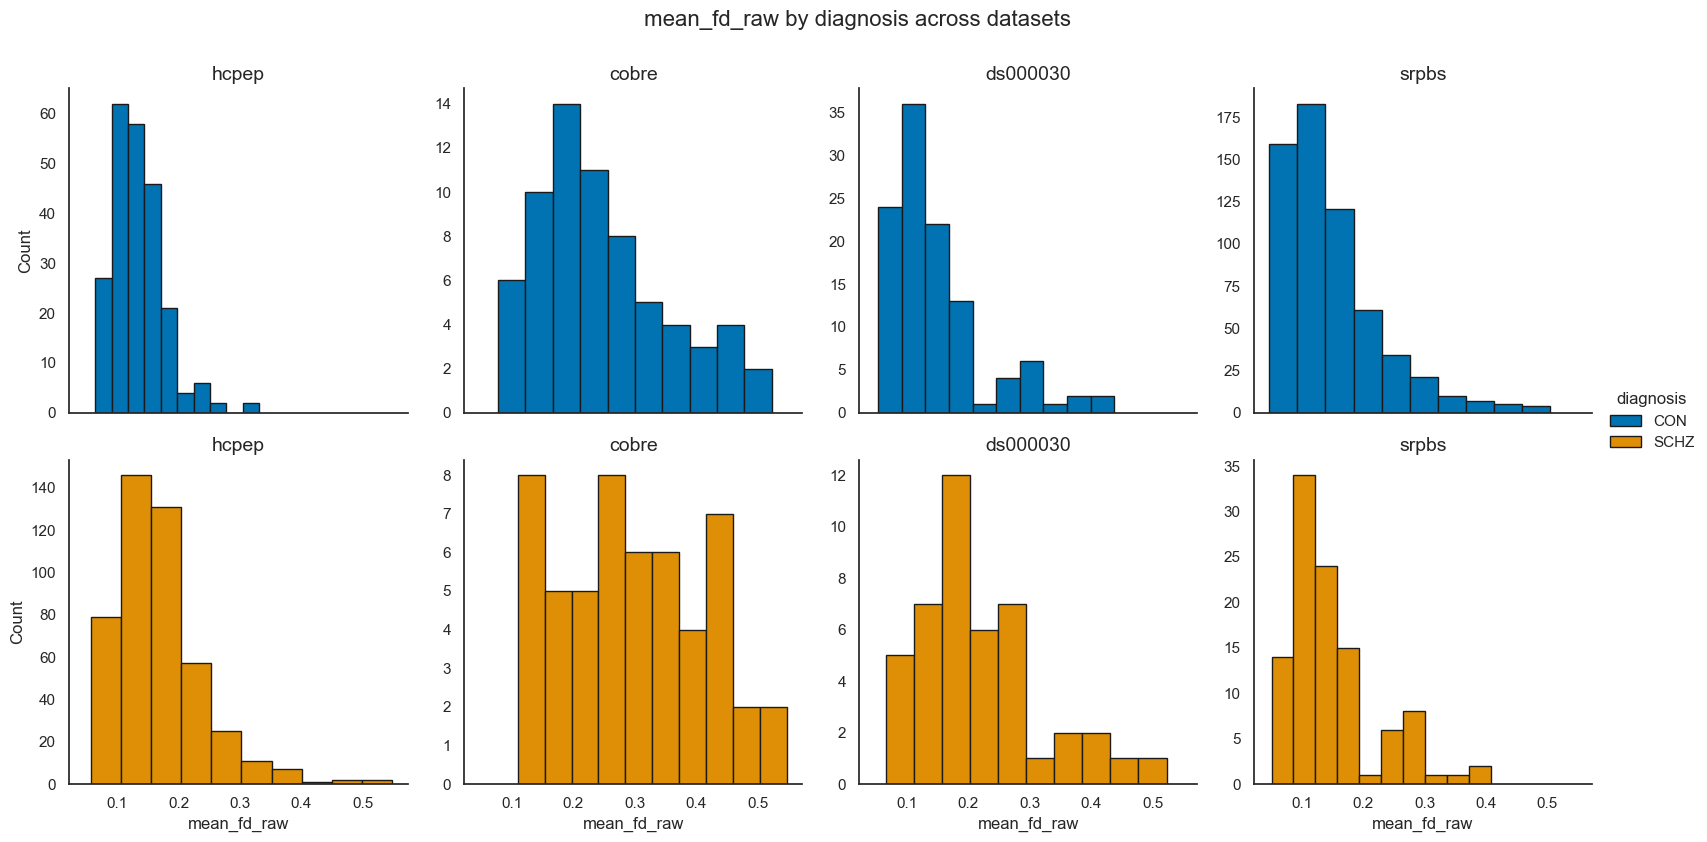

In [17]:
histogram_diagnosis_dataset(df, 'mean_fd_raw')

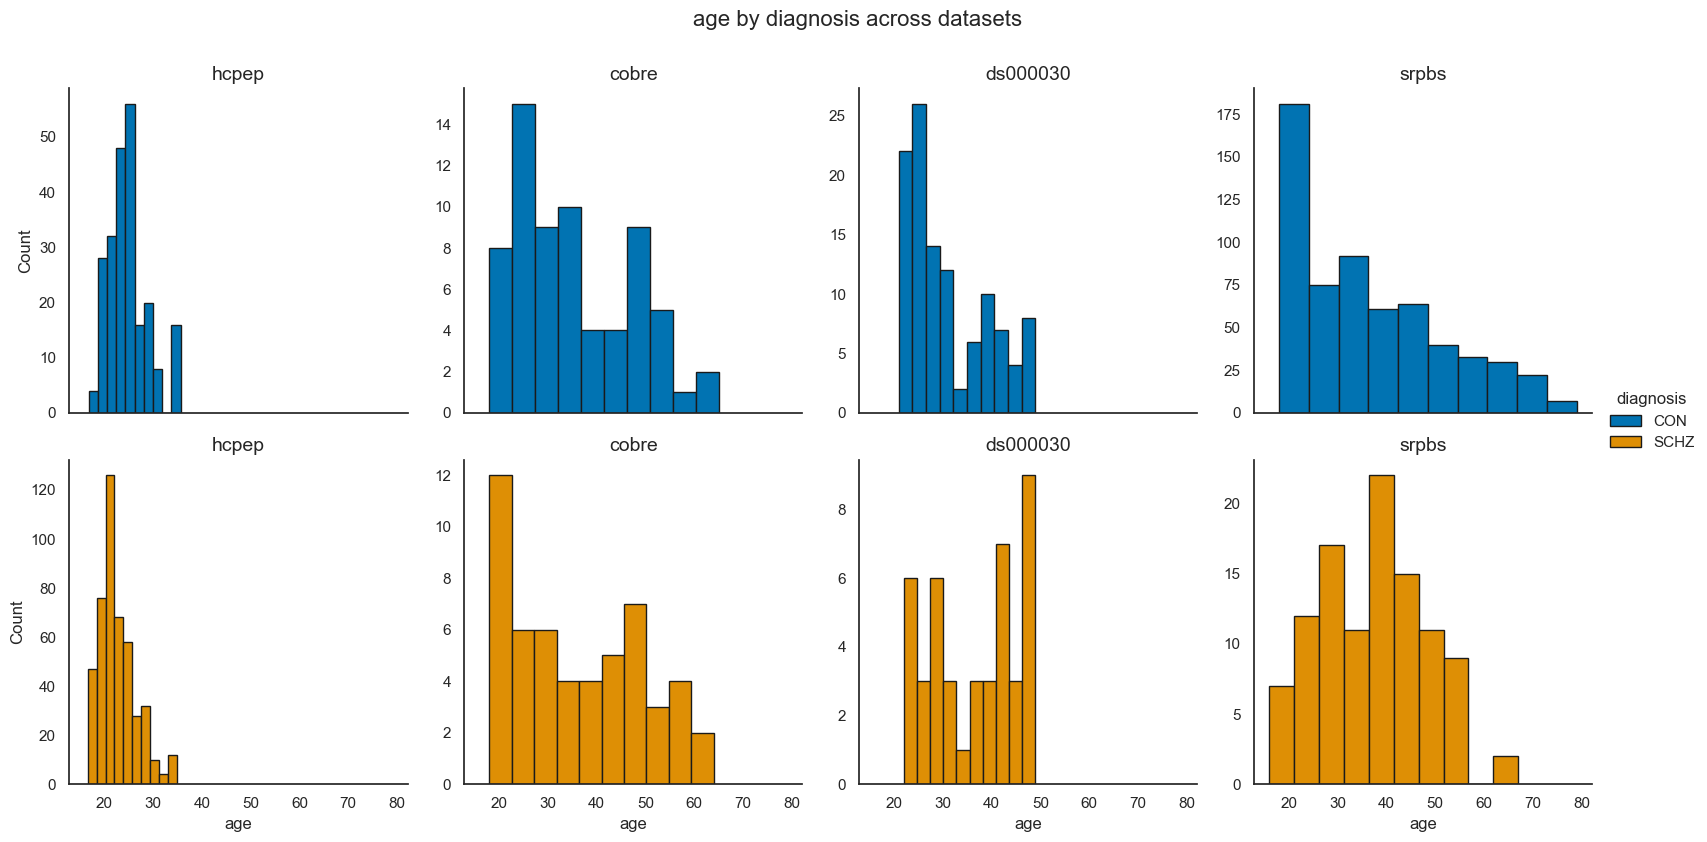

In [18]:
histogram_diagnosis_dataset(df, 'age')

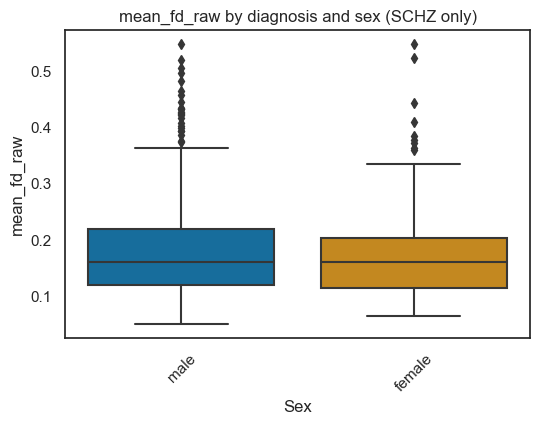

In [19]:
boxplot_diagnosis_sex(df, 'mean_fd_raw', 'SCHZ')

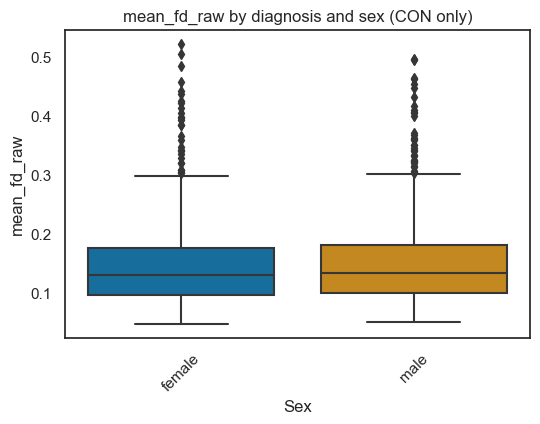

In [20]:
boxplot_diagnosis_sex(df, 'mean_fd_raw', 'CON')